In [123]:
from pathlib import Path
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import re
from gelgenie.segmentation.helper_functions.general_functions import create_dir_if_empty, index_converter
from collections import defaultdict
import pickle
import math
from scipy.stats import linregress
import pingouin
plt.rcParams.update({'font.sans-serif':'Microsoft Sans Serif'})  # consistent figure formatting

In [124]:
fig2a_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_A_band_data.csv')
fig2b_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_B_band_data.csv')
fig2c_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_C_band_data.csv')
fig2d_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_2_D_band_data.csv')
figs1A_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s1_A_band_data.csv')
figs1C_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s1_C_band_data.csv')
figs9A_1_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data.csv')
figs9A_2_df = pd.read_csv('../../../paper_data_analysis/matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data_2.csv')
Modification_required = [False, True, False, True, False, False, False, False]

# minor mods required for no-band areas
arun_2022_fig1f = pd.read_csv('../../../paper_data_analysis/arun_data_2022_toehold_clipping/GelGenie Analysis/fig_1F.csv')

# # minor mods required for no-band areas
arun_2022_fig3f_1 = pd.read_csv('../../../paper_data_analysis/arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_1.csv')
arun_2022_fig3f_2 = pd.read_csv('../../../paper_data_analysis/arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_2.csv')
arun_2022_fig3f_3 = pd.read_csv('../../../paper_data_analysis/arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_3.csv')

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_1 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig2c_1.csv')
arun_2021_multiplexed_2 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig2c_2.csv')
arun_2021_multiplexed_3 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig2c_3.csv')

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_4f_dna = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dna.csv')
arun_2021_multiplexed_4f_rna = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_rna.csv')
arun_2021_multiplexed_4f_dig = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dig.csv')
arun_2021_multiplexed_4f_sa = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/fig4f_sa.csv')

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_S4 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/figS4.csv')
arun_2021_multiplexed_S4_auto = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/figS4_auto.csv')

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_S5_1 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/figS5_1.csv')
arun_2021_multiplexed_S5_2 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/figS5_2.csv')
arun_2021_multiplexed_S5_3 = pd.read_csv('../../../paper_data_analysis/arun_data_multiplexed_2021/GelGenie Analysis/figS5_3.csv')

# # major changes necessary - many bands missed (out-of-distribution data)
arun_2016_nucleic_acid_sensor = pd.read_csv('../../../paper_data_analysis/arun_data_nucleic_acid_sensor_2016/GelGenie Analysis/figS3A.csv')

# # major changes necessary - many bands missed (out-of-distribution data)
miracles_2b_1 = pd.read_csv('../../../paper_data_analysis/arun_data_miracles_2019/GelGenie Analysis/fig2B_1.csv')
miracles_2b_2 = pd.read_csv('../../../paper_data_analysis/arun_data_miracles_2019/GelGenie Analysis/fig2B_2.csv')
miracles_2b_3 = pd.read_csv('../../../paper_data_analysis/arun_data_miracles_2019/GelGenie Analysis/fig2B_3.csv')

# # major changes necessary - many bands missed (out-of-distribution data)
miracles_3f = pd.read_csv('../../../paper_data_analysis/arun_data_miracles_2019/GelGenie Analysis/fig3F.csv')

## Multiplexed Paper

- previous analysis = analysis conducted in the paper
- gel genie = both raw volume and rolling ball corrected volume 
- always use rolling ball to compare to previous analysis as paper analyis involved background correction

### Figure 2a

In [125]:
figs1A_df.head()

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis
0,2,7,27246,4285,4.444444,67
1,3,3,25702,4159,1.111111,65
2,4,6,28748,4798,3.333333,84
3,6,6,45000,15390,11.111111,238
4,6,10,36813,5065,2.222222,97


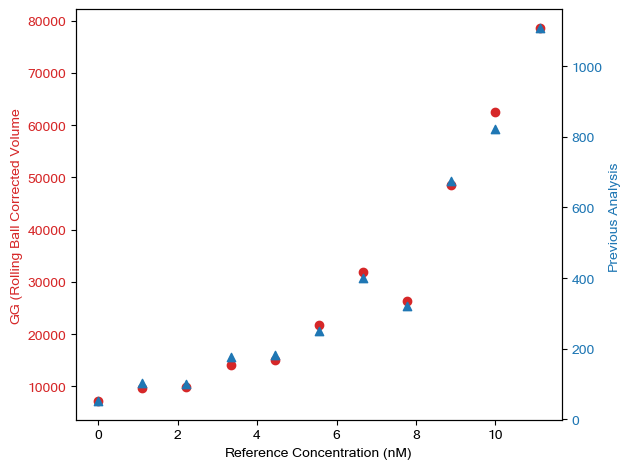

In [126]:
# plot to compare GG Rolling Ball Corrected Volume and Previous Paper Analysis

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Reference Concentration (nM)')
ax1.set_ylabel('GG (Rolling Ball Corrected Volume', color=color)
ax1.scatter(fig2a_df['Reference'], fig2a_df['Rolling Ball Corrected Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Previous Analysis', color=color)  # we already handled the x-label with ax1
ax2.scatter(fig2a_df['Reference'], fig2a_df['Previous Analysis'], color=color, marker='^') # changed marker for accessibility
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

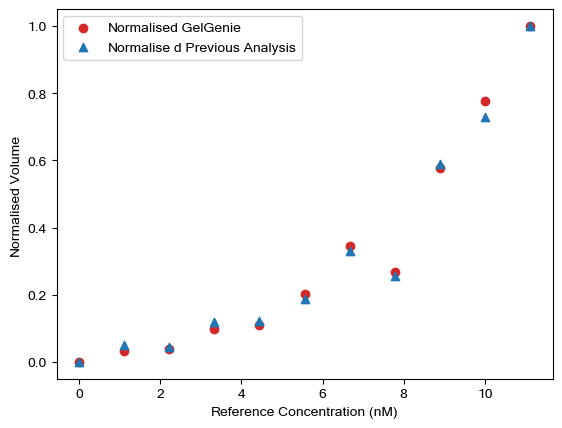

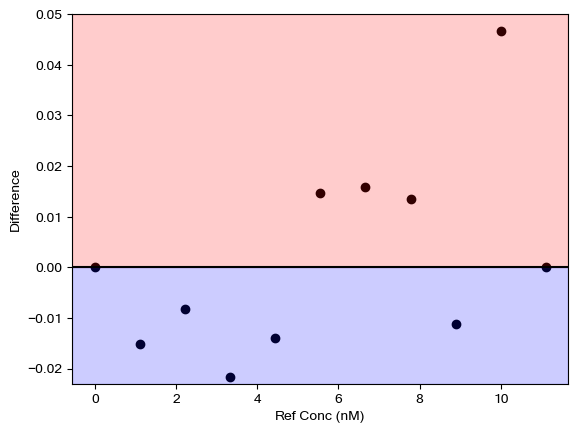

In [127]:
# normalise rolling ball corrected volume and previous analysis for comparison

# need to check if this is the best way to normalise the data
fig2a_df['Normalised Rolling Ball Corrected Volume'] = (fig2a_df['Rolling Ball Corrected Volume'] - fig2a_df['Rolling Ball Corrected Volume'].min()) / (fig2a_df['Rolling Ball Corrected Volume'].max() - fig2a_df['Rolling Ball Corrected Volume'].min())

fig2a_df['Normalised Previous Analysis'] = (fig2a_df['Previous Analysis'] - fig2a_df['Previous Analysis'].min()) / (fig2a_df['Previous Analysis'].max() - fig2a_df['Previous Analysis'].min())

plt.scatter(fig2a_df['Reference'], fig2a_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(fig2a_df['Reference'], fig2a_df['Normalised Previous Analysis'], label='Normalise d Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

# attempting to show the difference between the two normalised values
# the colour the point is in indicates which was higher, i.e. red means GG was higher to be consistent with previous plots
plt.scatter(fig2a_df['Reference'], fig2a_df['Normalised Rolling Ball Corrected Volume'] - fig2a_df['Normalised Previous Analysis'], color='black')
plt.xlabel('Ref Conc (nM)')
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Difference')
plt.axhspan(0, 0.05, alpha=0.2, color='red')
plt.axhspan(0, -0.023, alpha=0.2, color='blue')
plt.ylim(-0.023, 0.05)
plt.show()

In [128]:
fig2a_df['Percentage Error'] = abs(fig2a_df['Normalised Rolling Ball Corrected Volume'] - fig2a_df['Normalised Previous Analysis']) / fig2a_df['Normalised Previous Analysis'] * 100

fig2a_df['Percentage Error'] = fig2a_df['Percentage Error'].fillna(0)

fig2a_df.head(20) 

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis,Normalised Rolling Ball Corrected Volume,Normalised Previous Analysis,Percentage Error
0,2,3,60005.0,7170.0,0.000000,52,0.000000,0.000000,0.000000
1,2,7,72237.0,14962.0,4.444444,182,0.109028,0.122990,11.351998
2,3,8,71807.0,14138.0,3.333333,178,0.097498,0.119205,18.209859
3,4,4,164651.0,78638.0,11.111111,1109,1.000000,1.000000,0.000000
4,4,8,74581.0,9833.0,2.222222,100,0.037261,0.045412,17.947222
5,5,3,135822.0,62570.0,10.000000,822,0.775172,0.728477,6.409989
6,5,8,73031.0,9598.0,1.111111,104,0.033973,0.049196,30.942843
7,6,4,115404.0,48429.0,8.888889,674,0.577307,0.588458,1.894880
8,7,4,85121.0,26324.0,7.777778,321,0.268008,0.254494,5.310230
9,8,4,92384.0,31829.0,6.666667,400,0.345036,0.329234,4.799588


### Figure 2b

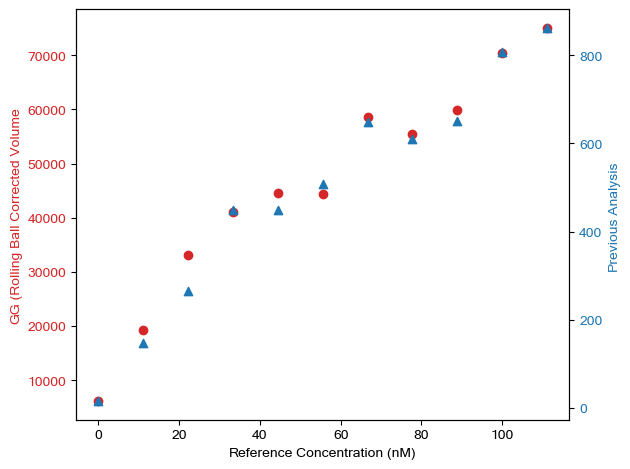

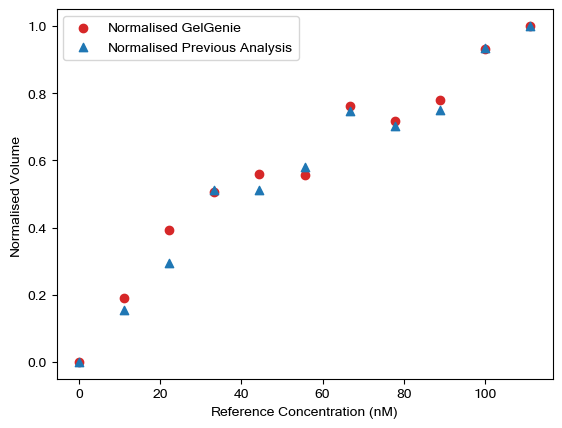

In [129]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Reference Concentration (nM)')
ax1.set_ylabel('GG (Rolling Ball Corrected Volume', color=color)
ax1.scatter(fig2b_df['Reference'], fig2b_df['Rolling Ball Corrected Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Previous Analysis', color=color)  # we already handled the x-label with ax1
ax2.scatter(fig2b_df['Reference'], fig2b_df['Previous Analysis'], color=color, marker='^')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig2b_df['Normalised Rolling Ball Corrected Volume'] = (fig2b_df['Rolling Ball Corrected Volume'] - fig2b_df['Rolling Ball Corrected Volume'].min()) / (fig2b_df['Rolling Ball Corrected Volume'].max() - fig2b_df['Rolling Ball Corrected Volume'].min())

fig2b_df['Normalised Previous Analysis'] = (fig2b_df['Previous Analysis'] - fig2b_df['Previous Analysis'].min()) / (fig2b_df['Previous Analysis'].max() - fig2b_df['Previous Analysis'].min())

plt.scatter(fig2b_df['Reference'], fig2b_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(fig2b_df['Reference'], fig2b_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

In [130]:
fig2b_df['Percentage Error'] = abs(fig2b_df['Normalised Rolling Ball Corrected Volume'] - fig2b_df['Normalised Previous Analysis']) / fig2b_df['Normalised Previous Analysis'] * 100

fig2b_df['Percentage Error'] = fig2b_df['Percentage Error'].fillna(0)

fig2b_df.head(20)

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis,Normalised Rolling Ball Corrected Volume,Normalised Previous Analysis,Percentage Error
0,2,5,49543.0,6130.0,0.000000,15,0.000000,0.000000,0.000000
1,2,17,123109.0,40960.0,33.333333,449,0.505039,0.511792,1.319610
2,3,5,155840.0,75095.0,111.111111,863,1.000000,1.000000,0.000000
3,3,10,119061.0,33185.0,22.222222,265,0.392300,0.294811,33.068310
4,4,5,151515.0,70340.0,100.000000,807,0.931052,0.933962,0.311606
5,4,10,86730.0,19286.0,11.111111,146,0.190763,0.154481,23.486557
6,5,5,142911.0,59837.0,88.888889,650,0.778757,0.748821,3.997831
7,6,5,135323.0,55540.0,77.777778,611,0.716450,0.702830,1.937905
8,7,5,140143.0,58573.0,66.666667,649,0.760429,0.747642,1.710404
9,8,5,120931.0,44415.0,55.555556,507,0.555137,0.580189,4.317908


## Figure 2c

In [131]:
fig2c_df.head()

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Previous Analysis
0,2,4,219445.0,141504.0,2187.702780
1,3,7,54313.0,7465.0,73.159437
2,5,6,80415.0,23947.0,332.037683
3,7,6,53849.0,6048.0,27.874337
4,8,6,58525.0,3811.0,3.660111


<Axes: >

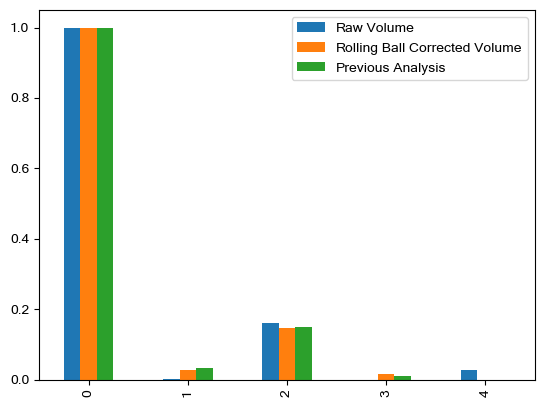

In [132]:
# does not contain reference concentrations

normalized_fig2c_df=(fig2c_df-fig2c_df.min())/(fig2c_df.max()-fig2c_df.min())
normalized_fig2c_df.drop(columns=['Lane ID', 'Band ID']).plot.bar()

## Figure 2d

In [133]:
fig2d_df.head()

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis
0,2,4,102179.0,60474.0,0.000000,841
1,2,6,119177.0,85793.0,444.444444,1231
2,3,4,115150.0,83739.0,333.333333,1169
3,4,2,136803.0,99186.0,1111.111111,1346
4,4,4,115396.0,83053.0,222.222222,1166


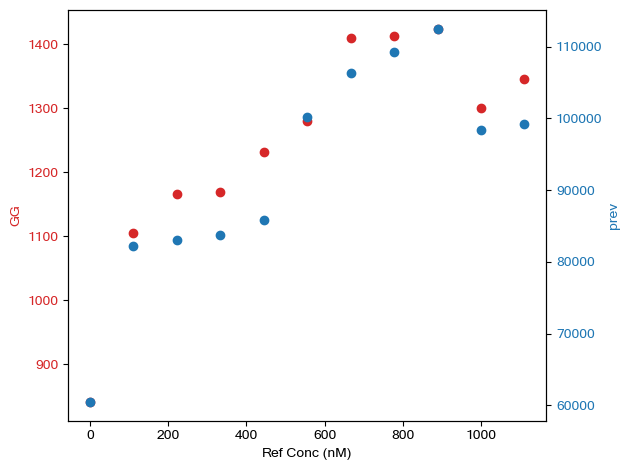

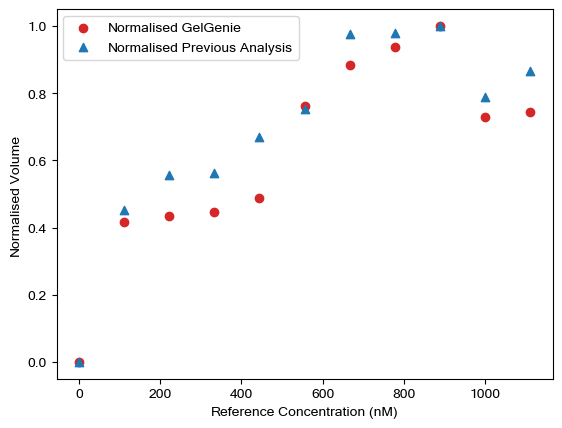

In [134]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
ax1.scatter(fig2d_df['Reference'], fig2d_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prev', color=color)  # we already handled the x-label with ax1
ax2.scatter(fig2d_df['Reference'], fig2d_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig2d_df['Normalised Rolling Ball Corrected Volume'] = (fig2d_df['Rolling Ball Corrected Volume'] - fig2d_df['Rolling Ball Corrected Volume'].min()) / (fig2d_df['Rolling Ball Corrected Volume'].max() - fig2d_df['Rolling Ball Corrected Volume'].min())

fig2d_df['Normalised Previous Analysis'] = (fig2d_df['Previous Analysis'] - fig2d_df['Previous Analysis'].min()) / (fig2d_df['Previous Analysis'].max() - fig2d_df['Previous Analysis'].min())

plt.scatter(fig2d_df['Reference'], fig2d_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(fig2d_df['Reference'], fig2d_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

In [135]:
fig2d_df['Percentage Error'] = abs(fig2d_df['Normalised Rolling Ball Corrected Volume'] - fig2d_df['Normalised Previous Analysis']) / fig2d_df['Normalised Previous Analysis'] * 100

fig2d_df['Percentage Error'] = fig2d_df['Percentage Error'].fillna(0)

fig2d_df.head(20)

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis,Normalised Rolling Ball Corrected Volume,Normalised Previous Analysis,Percentage Error
0,2,4,102179.0,60474.0,0.000000,841,0.000000,0.000000,0.000000
1,2,6,119177.0,85793.0,444.444444,1231,0.486483,0.668954,27.277051
2,3,4,115150.0,83739.0,333.333333,1169,0.447017,0.562607,20.545453
3,4,2,136803.0,99186.0,1111.111111,1346,0.743818,0.866209,14.129543
4,4,4,115396.0,83053.0,222.222222,1166,0.433836,0.557461,22.176477
5,5,2,134275.0,98413.0,1000.000000,1300,0.728965,0.787307,7.410287
6,5,4,112678.0,82204.0,111.111111,1105,0.417523,0.452830,7.796939
7,6,2,152578.0,112519.0,888.888889,1424,1.000000,1.000000,0.000000
8,7,2,148437.0,109224.0,777.777778,1412,0.936689,0.979417,4.362536
9,8,2,143478.0,106406.0,666.666667,1410,0.882544,0.975986,9.574143


## Figs1A

In [136]:
figs1A_df.head()

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis
0,2,7,27246,4285,4.444444,67
1,3,3,25702,4159,1.111111,65
2,4,6,28748,4798,3.333333,84
3,6,6,45000,15390,11.111111,238
4,6,10,36813,5065,2.222222,97


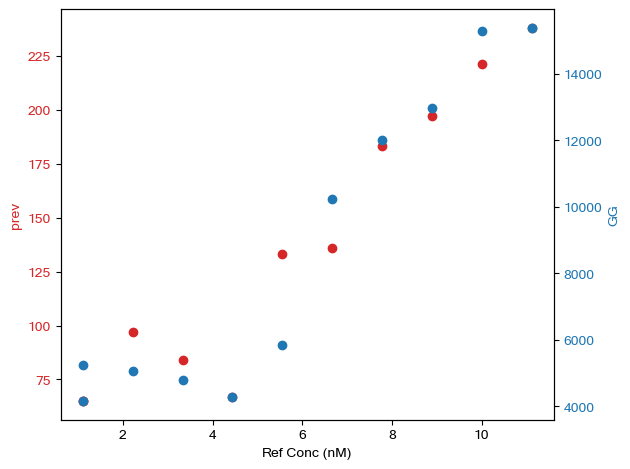

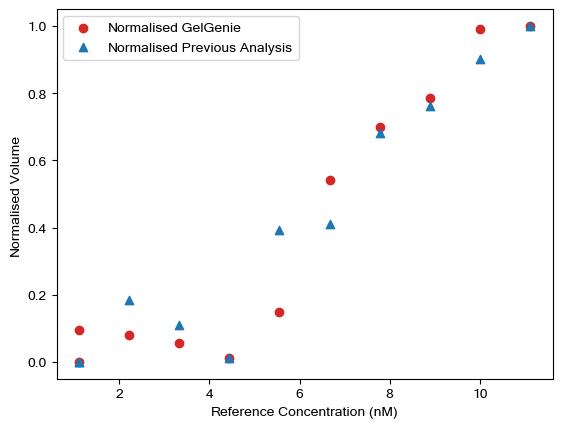

In [137]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('prev', color=color)
ax1.scatter(figs1A_df['Reference'], figs1A_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GG', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs1A_df['Reference'], figs1A_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

figs1A_df['Normalised Rolling Ball Corrected Volume'] = (figs1A_df['Rolling Ball Corrected Volume'] - figs1A_df['Rolling Ball Corrected Volume'].min()) / (figs1A_df['Rolling Ball Corrected Volume'].max() - figs1A_df['Rolling Ball Corrected Volume'].min())

figs1A_df['Normalised Previous Analysis'] = (figs1A_df['Previous Analysis'] - figs1A_df['Previous Analysis'].min()) / (figs1A_df['Previous Analysis'].max() - figs1A_df['Previous Analysis'].min())

plt.scatter(figs1A_df['Reference'], figs1A_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(figs1A_df['Reference'], figs1A_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

In [138]:
figs1A_df['Percentage Error'] = abs(figs1A_df['Normalised Rolling Ball Corrected Volume'] - figs1A_df['Normalised Previous Analysis']) / figs1A_df['Normalised Previous Analysis'] * 100

figs1A_df['Percentage Error'] = figs1A_df['Percentage Error'].fillna(0)

figs1A_df.head(20)

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference,Previous Analysis,Normalised Rolling Ball Corrected Volume,Normalised Previous Analysis,Percentage Error
0,2,7,27246,4285,4.444444,67,0.011219,0.011561,2.956104
1,3,3,25702,4159,1.111111,65,0.000000,0.000000,0.000000
2,4,6,28748,4798,3.333333,84,0.056896,0.109827,48.194612
3,6,6,45000,15390,11.111111,238,1.000000,1.000000,0.000000
4,6,10,36813,5065,2.222222,97,0.080670,0.184971,56.388011
5,7,6,44405,15293,10.000000,221,0.991363,0.901734,9.939636
6,7,10,37369,5241,1.111111,65,0.096340,0.000000,inf
7,8,5,43591,12985,8.888889,197,0.785861,0.763006,2.995362
8,9,5,42408,11997,7.777778,183,0.697890,0.682081,2.317737
9,10,5,40254,10245,6.666667,136,0.541893,0.410405,32.038711


## Percentage Error Boxplot

Text(0.5, 0, 'Figure')

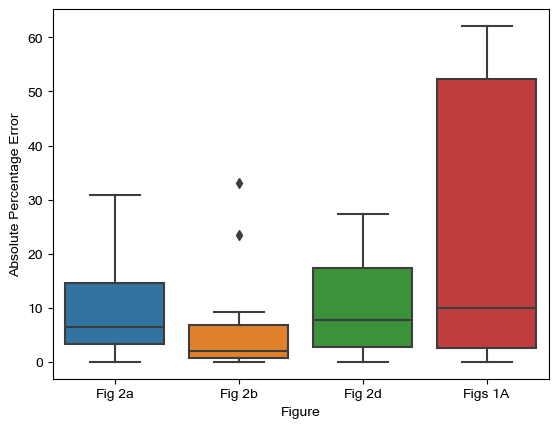

In [162]:
combined_df = pd.DataFrame({'Fig 2a': fig2a_df['Percentage Error'], 'Fig 2b': fig2b_df['Percentage Error'], 'Fig 2d': fig2d_df['Percentage Error'], 'Figs 1A': figs1A_df['Percentage Error']})

sns.boxplot(data=combined_df)
plt.ylabel('Absolute Percentage Error')
plt.xlabel('Figure')

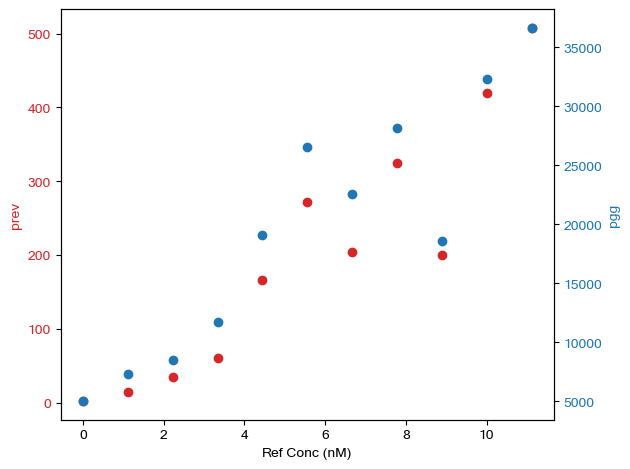

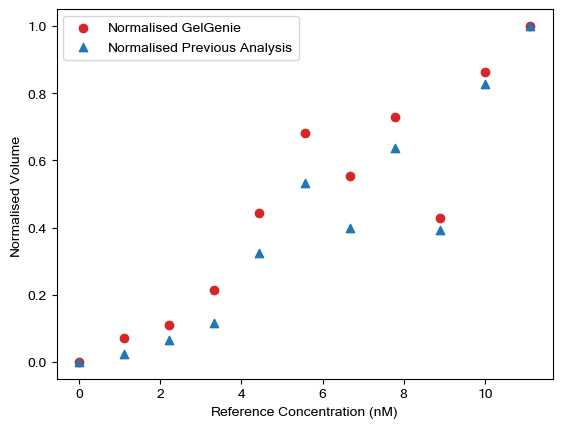

In [140]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('prev', color=color)
ax1.scatter(figs1C_df['Reference'], figs1C_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('pgg', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs1C_df['Reference'], figs1C_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

figs1C_df['Normalised Rolling Ball Corrected Volume'] = (figs1C_df['Rolling Ball Corrected Volume'] - figs1C_df['Rolling Ball Corrected Volume'].min()) / (figs1C_df['Rolling Ball Corrected Volume'].max() - figs1C_df['Rolling Ball Corrected Volume'].min())

figs1C_df['Normalised Previous Analysis'] = (figs1C_df['Previous Analysis'] - figs1C_df['Previous Analysis'].min()) / (figs1C_df['Previous Analysis'].max() - figs1C_df['Previous Analysis'].min())

plt.scatter(figs1C_df['Reference'], figs1C_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(figs1C_df['Reference'], figs1C_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

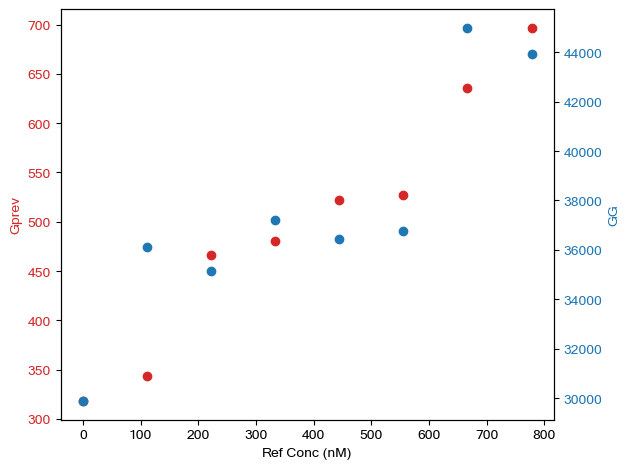

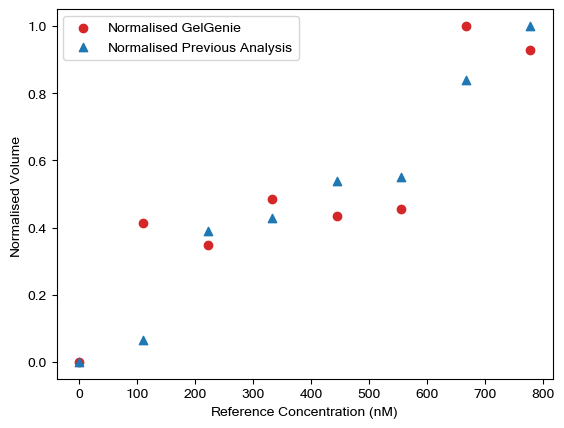

In [141]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('Gprev', color=color)
ax1.scatter(figs9A_1_df['Reference'], figs9A_1_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GG', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs9A_1_df['Reference'], figs9A_1_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

figs9A_1_df['Normalised Rolling Ball Corrected Volume'] = (figs9A_1_df['Rolling Ball Corrected Volume'] - figs9A_1_df['Rolling Ball Corrected Volume'].min()) / (figs9A_1_df['Rolling Ball Corrected Volume'].max() - figs9A_1_df['Rolling Ball Corrected Volume'].min())

figs9A_1_df['Normalised Previous Analysis'] = (figs9A_1_df['Previous Analysis'] - figs9A_1_df['Previous Analysis'].min()) / (figs9A_1_df['Previous Analysis'].max() - figs9A_1_df['Previous Analysis'].min())

plt.scatter(figs9A_1_df['Reference'], figs9A_1_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(figs9A_1_df['Reference'], figs9A_1_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

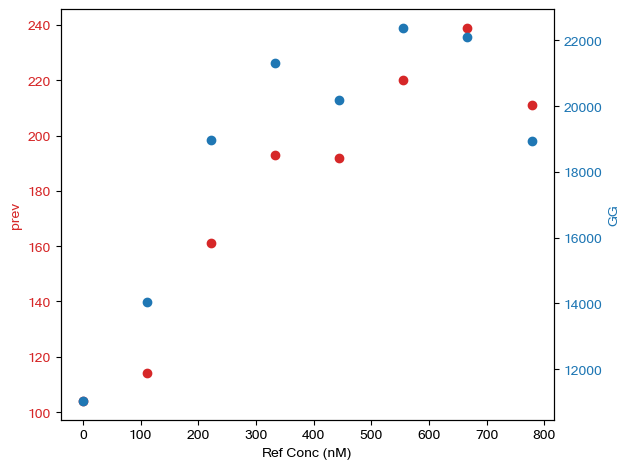

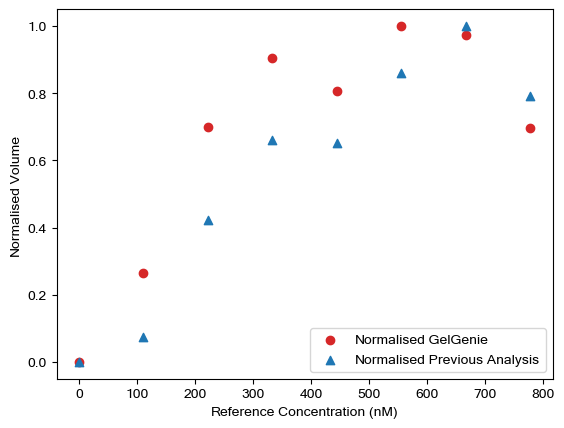

In [142]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('prev', color=color)
ax1.scatter(figs9A_2_df['Reference'], figs9A_2_df['Previous Analysis'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GG', color=color)  # we already handled the x-label with ax1
ax2.scatter(figs9A_2_df['Reference'], figs9A_2_df['Rolling Ball Corrected Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

figs9A_2_df['Normalised Rolling Ball Corrected Volume'] = (figs9A_2_df['Rolling Ball Corrected Volume'] - figs9A_2_df['Rolling Ball Corrected Volume'].min()) / (figs9A_2_df['Rolling Ball Corrected Volume'].max() - figs9A_2_df['Rolling Ball Corrected Volume'].min())

figs9A_2_df['Normalised Previous Analysis'] = (figs9A_2_df['Previous Analysis'] - figs9A_2_df['Previous Analysis'].min()) / (figs9A_2_df['Previous Analysis'].max() - figs9A_2_df['Previous Analysis'].min())

plt.scatter(figs9A_2_df['Reference'], figs9A_2_df['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red') 
plt.scatter(figs9A_2_df['Reference'], figs9A_2_df['Normalised Previous Analysis'], label='Normalised Previous Analysis', marker='^', color='tab:blue') 
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

## Arun 2022 Toehold Clipping

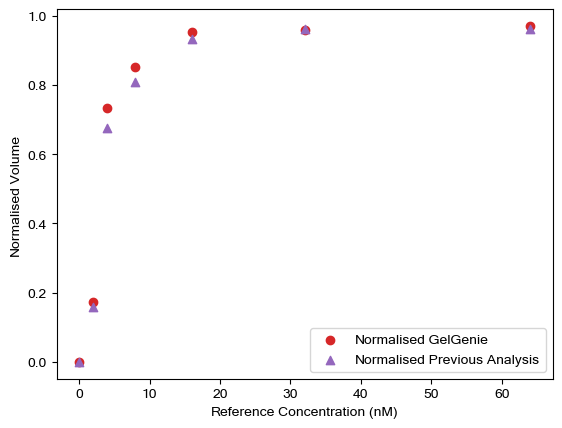

In [143]:
fig, ax1 = plt.subplots()

orig_data = np.array(arun_2022_fig1f['Original Analysis'])
gg_data = np.array(arun_2022_fig1f['Raw Volume'])
gg_data_bc = np.array(arun_2022_fig1f['Rolling Ball Corrected Volume'])

orig_data = (orig_data[0] - orig_data)/orig_data[0]
gg_data = (gg_data[0] - gg_data)/gg_data[0]
gg_data_bc = (gg_data_bc[0] - gg_data_bc)/gg_data_bc[0]

#zcolor = 'tab:red'
#ax1.set_xlabel('Reference Concentration (nM)')
#ax1.set_ylabel('GG (Rolling Ball Corrected Volume)', color=color)
#ax1.scatter(arun_2022_fig1f['Reference'], orig_data, color=color)
#ax1.tick_params(axis='y', labelcolor=color)
# ax1.scatter(arun_2022_fig1f['Reference'], gg_data, color='b')

#ax2 = ax1.twinx() 
#ax2.set_ylabel('Previous Analysis', color='y')
#ax2.scatter(arun_2022_fig1f['Reference'], gg_data_bc, color='y', marker='^')
#ax2.tick_params(axis='y', labelcolor='y')

plt.scatter(arun_2022_fig1f['Reference'], gg_data_bc, label='Normalised GelGenie', color='tab:red') 
plt.scatter(arun_2022_fig1f['Reference'], orig_data, label='Normalised Previous Analysis', marker='^', color='tab:purple') # used different color to show it was from a different paper
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

,Value,Analysis,Type
0,90.402794,GG,DNA
1,85.768477,GG,RNA
2,19.942308,GG,RNASE
3,94.755097,GGBC,DNA
4,89.494912,GGBC,RNA


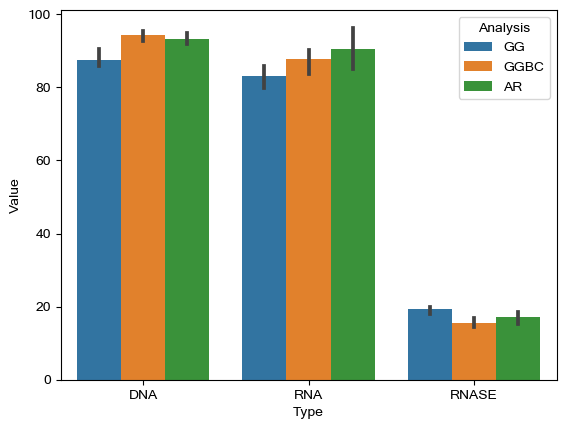

In [144]:
fig, ax1 = plt.subplots()

full_data = defaultdict(list)

for d in [arun_2022_fig3f_1, arun_2022_fig3f_2, arun_2022_fig3f_3]:

    full_data['Value'].append((100*d['Raw Volume'][0])/(d['Raw Volume'][0]+d['Raw Volume'][1]))
    full_data['Analysis'].append('GG')
    full_data['Type'].append('DNA')

    full_data['Value'].append((100*d['Raw Volume'][2])/(d['Raw Volume'][2]+d['Raw Volume'][3]))
    full_data['Analysis'].append('GG')
    full_data['Type'].append('RNA')
    
    full_data['Value'].append((100*d['Raw Volume'][4])/(d['Raw Volume'][4]+d['Raw Volume'][5]))
    full_data['Analysis'].append('GG')
    full_data['Type'].append('RNASE')

    full_data['Value'].append((100*d['Rolling Ball Corrected Volume'][0])/(d['Rolling Ball Corrected Volume'][0]+d['Rolling Ball Corrected Volume'][1]))
    full_data['Analysis'].append('GGBC')
    full_data['Type'].append('DNA')

    full_data['Value'].append((100*d['Rolling Ball Corrected Volume'][2])/(d['Rolling Ball Corrected Volume'][2]+d['Rolling Ball Corrected Volume'][3]))
    full_data['Analysis'].append('GGBC')
    full_data['Type'].append('RNA')

    full_data['Value'].append((100*d['Rolling Ball Corrected Volume'][4])/(d['Rolling Ball Corrected Volume'][4]+d['Rolling Ball Corrected Volume'][5]))
    full_data['Analysis'].append('GGBC')
    full_data['Type'].append('RNASE')

    full_data['Value'].append((100*d['Provided Analysis'][0])/(d['Provided Analysis'][0]+d['Provided Analysis'][1]))
    full_data['Analysis'].append('AR')
    full_data['Type'].append('DNA')

    full_data['Value'].append((100*d['Provided Analysis'][2])/(d['Provided Analysis'][2]+d['Provided Analysis'][3]))
    full_data['Analysis'].append('AR')
    full_data['Type'].append('RNA')

    full_data['Value'].append((100*d['Provided Analysis'][4])/(d['Provided Analysis'][4]+d['Provided Analysis'][5]))
    full_data['Analysis'].append('AR')
    full_data['Type'].append('RNASE')

full_data_df = pd.DataFrame.from_dict(full_data)

sns.barplot(x='Type', y='Value', hue='Analysis',data=full_data_df)

full_data_df.head()

c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.00392156862745098, 0.45098039215686275, 0.6980392156862745)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packag

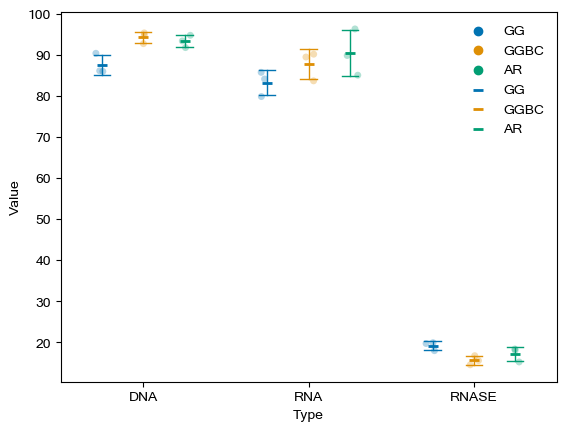

In [145]:
# plotted like this as I am not a fan of bar charts for this type of data

sns.stripplot(data=full_data_df, x='Type', y='Value', hue='Analysis', dodge=True, jitter=True, alpha=0.3, palette='colorblind')
sns.pointplot(data=full_data_df, x='Type', y='Value', hue='Analysis',dodge=0.5, join=False, errorbar='sd', markers='_', errwidth=1, capsize=0.1, palette='colorblind') 
plt.legend(frameon=False)

## Arun Multiplexed 2021

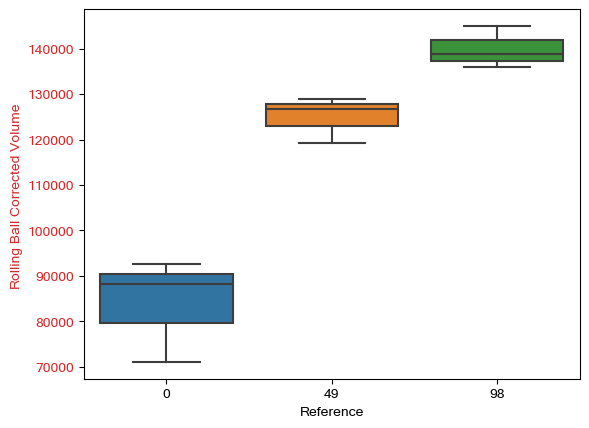

In [146]:
# fig 2C
fig, ax1 = plt.subplots()

full_df = pd.concat([arun_2021_multiplexed_1, arun_2021_multiplexed_2, arun_2021_multiplexed_3], ignore_index=True)

color = 'tab:red'
ax1.set_xlabel('Ref Conc (nM)')
ax1.set_ylabel('GG', color=color)
sns.boxplot(data=full_df[full_df['Reference'] < 100], x='Reference', y='Rolling Ball Corrected Volume')

ax1.tick_params(axis='y', labelcolor=color)

# need to think about how to present this data - perhaps by calculating the LOD or just simply the same scatter chart with error bars that Arun did?


c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

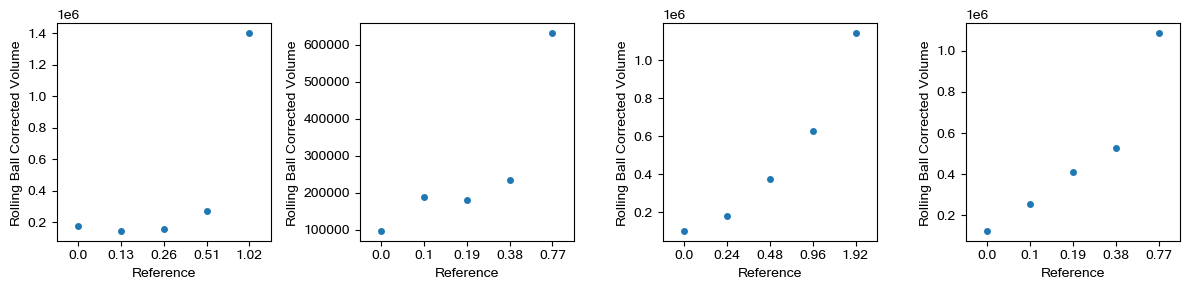

In [147]:
# fig 4f

arun_2021_multiplexed_4f_sa 

fig, axs = plt.subplots(1, 4, figsize=(12,3))

# axs[0].bar(arun_2021_multiplexed_4f_dig['Reference'], arun_2021_multiplexed_4f_dig['Rolling Ball Corrected Volume'])
sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_dig, ax=axs[0])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_dig, ax=axs[0])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_rna, ax=axs[1])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_rna, ax=axs[1])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_dna, ax=axs[2])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_dna, ax=axs[2])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_sa, ax=axs[3])
# sns.stripplot(x='Reference', y='Raw Volume', data=arun_2021_multiplexed_4f_sa, ax=axs[3])

plt.tight_layout()

[1.         0.59285937]
[1.         0.12551765]
[1.         0.06949726]
[1.         0.11732689]


c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will

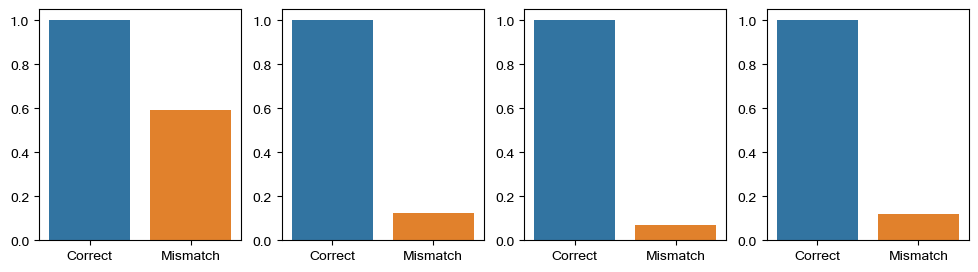

In [148]:
# fig S4

arun_2021_multiplexed_S4

fig, axs = plt.subplots(1, 4, figsize=(12,3))
cat_axis = ['Correct','Mismatch']

for ind, ax in enumerate(axs):
    data = np.array(arun_2021_multiplexed_S4.iloc[ind*2:(ind*2)+2]['Rolling Ball Corrected Volume'])
    data = data/data[0]
    print(data)
    sns.barplot(y=data,x=cat_axis,ax=ax)


[1.        0.6035955]
[1.         0.19519201]
[1.         0.08397906]
[1.         0.15101193]


c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will

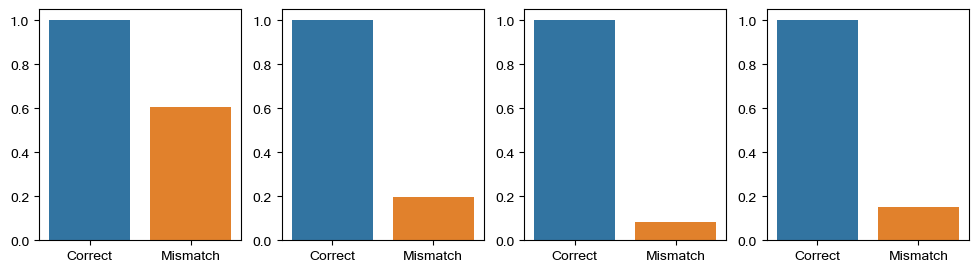

In [149]:
# fig S4-auto
arun_2021_multiplexed_S4

fig, axs = plt.subplots(1, 4, figsize=(12,3))
cat_axis = ['Correct','Mismatch']

for ind, ax in enumerate(axs):
    data = np.array(arun_2021_multiplexed_S4_auto.iloc[ind*2:(ind*2)+2]['Rolling Ball Corrected Volume'])
    data = data/data[0]
    print(data)
    sns.barplot(y=data,x=cat_axis,ax=ax)


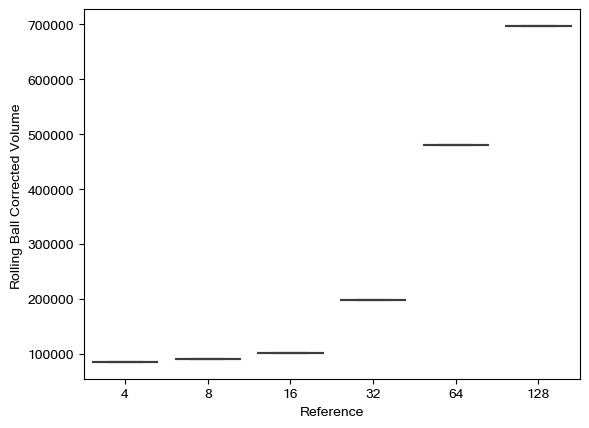

In [150]:
# Fig S5

fig, ax1 = plt.subplots()

full_df = pd.concat([arun_2021_multiplexed_S5_1, arun_2021_multiplexed_S5_1, arun_2021_multiplexed_S5_1], ignore_index=True)

b = sns.boxplot(data=full_df[full_df['Reference']>3], x='Reference', y='Rolling Ball Corrected Volume')

# ax1.tick_params(axis='y', labelcolor=color)

# DATA IS LINEAR BUT FOR SOME REASON DISPLAY IS WEIRD - NEED TO INVESTIGATE

In [151]:
arun_2021_multiplexed_S5_1

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference
0,1,1,390897,73883,0
1,2,1,403445,85661,2
2,3,1,428108,85431,4
3,4,1,439450,91168,8
4,5,1,456098,102514,16
5,6,1,571051,198015,32
6,7,1,886008,481094,64
7,8,1,1140455,697163,128


In [152]:
full_df

,Lane ID,Band ID,Raw Volume,Rolling Ball Corrected Volume,Reference
0,1,1,390897,73883,0
1,2,1,403445,85661,2
2,3,1,428108,85431,4
3,4,1,439450,91168,8
4,5,1,456098,102514,16
5,6,1,571051,198015,32
6,7,1,886008,481094,64
7,8,1,1140455,697163,128
8,1,1,390897,73883,0
9,2,1,403445,85661,2


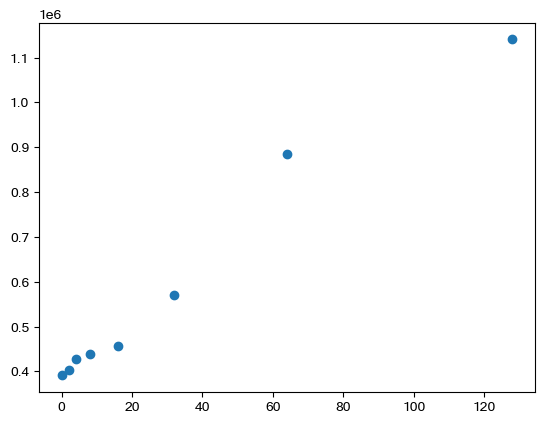

In [153]:
plt.scatter(arun_2021_multiplexed_S5_1['Reference'], arun_2021_multiplexed_S5_1['Raw Volume'])

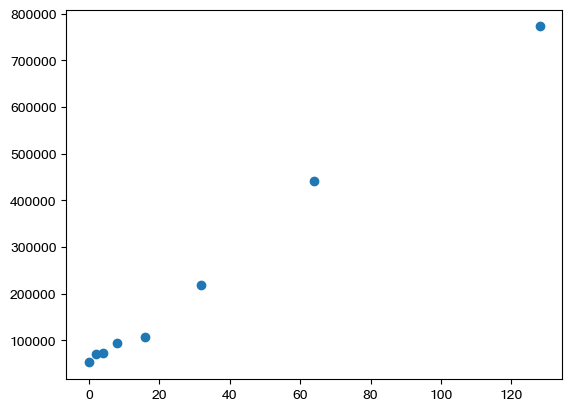

In [154]:
plt.scatter(arun_2021_multiplexed_S5_3['Reference'], arun_2021_multiplexed_S5_3['Rolling Ball Corrected Volume'])

## Arun Nucleic Acid Sensor 2016

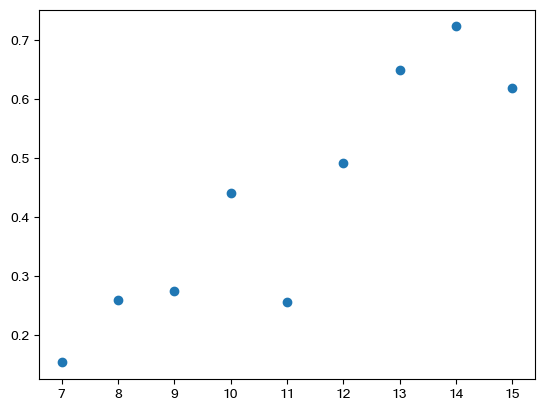

In [155]:
# CALCULATE FRACTION OF EACH THEN SCATTER PLOT....

plot_data = []
ref_data = []
for i in range(9):
    R1 = arun_2016_nucleic_acid_sensor.iloc[2*i]['Rolling Ball Corrected Volume']
    R2 = arun_2016_nucleic_acid_sensor.iloc[2*i+1]['Rolling Ball Corrected Volume']
    plot_data.append(R1/(R2+R1))
    ref_data.append(15-i)
plt.scatter(ref_data, plot_data)

## Arun Miracles 2019

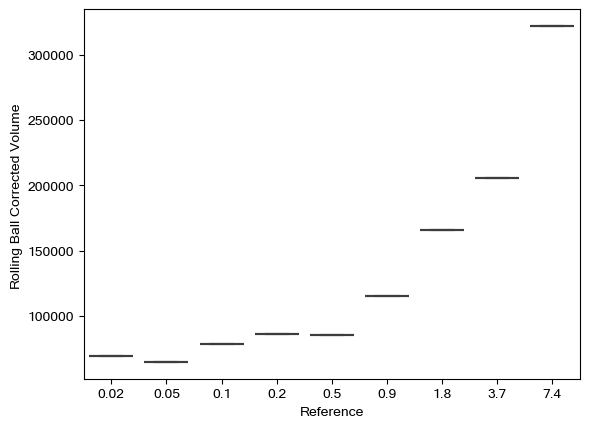

In [156]:
# DO NOT INCLUDE IN RESULTS - ARUN'S ANALYSIS CANNOT BE REPLICATED

# FIG 2B


fig, ax1 = plt.subplots()

full_df = pd.concat([miracles_2b_1, miracles_2b_1, miracles_2b_1], ignore_index=True)

b = sns.boxplot(data=full_df[full_df['Reference']>0], x='Reference', y='Rolling Ball Corrected Volume')
# b = sns.boxplot(data=full_df[full_df['Reference']>0.1], x='Reference', y='Raw Volume')

# 0.5/0.2 doesn't match paper but otherwise ok

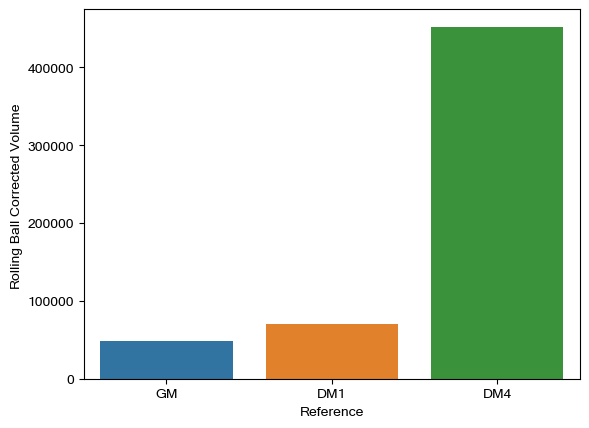

In [157]:
# FIG 3F

fig, ax1 = plt.subplots()

b = sns.barplot(data=miracles_3f, x='Reference', y='Rolling Ball Corrected Volume')
# low value does not match paper - probably something different was done for blank values.